## choosing the right estimator/algorithm for our problem
scikit-learn uses estimator as another term for machine learning model or algorithm

* classifification - predicting whether a sample is one thing or another
* regression - predicting a number

cheat sheet https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### picking for a regression problem

In [1]:
# import boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [2]:
import pandas as pd

boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# how many samples?
len(boston_df)

506

In [4]:
# let's try the ridge regression model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import numpy as np

# setup random seed
np.random.seed(42)

# create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate ridge model
model = Ridge()
model.fit(X_train, y_train)

# check the score of the ridge model on test data
model.score(X_test, y_test)

0.6662221670168522

how to improve this score?

what if ridge wasn't working?

refer back to the cheat sheet

In [5]:
# let's try randome forest regressor
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate random forest regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# evaluate the random forest regressor
rf.score(X_test, y_test)

0.8654448653350507

### picking for a classification problem
refer to the cheat sheet/map

In [6]:
heart_disease = pd.read_csv('./heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
len(heart_disease)

303

consulting the map and it says to try LinearSVC

In [8]:
# import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# make data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# evaluate the linearSVC
clf.score(X_test, y_test)

D:\anaconda3\envs\mlearning\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [9]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# evaluate the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

-if structured data (tables or dataframes) use ensemble methods (random forest, etc)

-if unstructured data (images, sound, etc) use deep learning or transfer learning

## fit the model/algorithm on our data and use it to make predictions

* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [11]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier()

# fit the model to the data (training the model)
clf.fit(X_train, y_train)

# evaluate the RandomForestClassifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

In [12]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## making predictions with a model

2 ways to make predictions"
1. `predict()`
2. `predict_proba()`

In [14]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [15]:
# use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [16]:
# true labels
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [17]:
# compare predictions to true labels to evaluae the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [18]:
clf.score(X_test, y_test)

0.8524590163934426

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [20]:
# make predictions with predict_proba()
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [21]:
# predict() on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models

In [22]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [23]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fit model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# make predictions
y_preds = model.predict(X_test)

In [24]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [25]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [26]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

## Evaluating a model
https://scikit-learn.org/stable/modules/model_evaluation.html

Three ways to evaluate sklearn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

#### Evaluating a model with the `score` method

In [27]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Set a random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
model.score(X_train, y_train) # shift+tab - mean acc

1.0

In [30]:
model.score(X_test, y_test)

0.8524590163934426

The same for regression

In [31]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Set a random seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit a model
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
model2.score(X_test, y_test) # shift+tab - coef det

0.8654448653350507

#### Evaluating a model with the `scoring` parameter

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Set a random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
model.score(X_test, y_test)

0.8524590163934426

In [36]:
cross_val_score(model, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [37]:
cross_val_score(model, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [38]:
np.random.seed(42)

# Single train test split score
model_single_score = model.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
model_cross_val_score = np.mean(cross_val_score(model, X, y, cv=5))

# Compare the two
model_single_score, model_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [39]:
# Scoring parameter set to None by default
cross_val_score(model, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [40]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
# Import cross val score and random forest classifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Set a random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Cross validation
clf = RandomForestClassifier()
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [42]:
score = cross_val_score(clf, X, y, cv=5)
np.mean(score)

0.8018032786885245

In [43]:
print(f'Heart disease classifier cross-validated accuracy: {np.mean(score)*100:.2f}%')

Heart disease classifier cross-validated accuracy: 80.18%


**Area under the receiver operating characteristic curve (AUC/ROC)**
* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negatve= model predicts 0 when truth is 1

In [44]:
# Import ROC curve
from sklearn.metrics import roc_curve

# Set a random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:5], len(y_probs)

(array([[0.89, 0.11],
        [0.49, 0.51],
        [0.43, 0.57],
        [0.84, 0.16],
        [0.18, 0.82]]),
 61)

In [45]:
y_probs_positives = y_probs[:, 1]
y_probs_positives[:5]

array([0.11, 0.51, 0.57, 0.16, 0.82])

In [46]:
# Calculate fpr, tpr, and treshholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positives)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

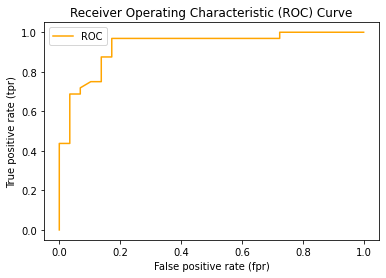

In [47]:
# Create a funciton for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve given the false positive rate (fpr)
    and tru positive rate (tpr) of a model.
    '''
    # Plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    
    # Plot line with no predictive power (baseline)
    # plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [48]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positives) # score under the curve

0.9304956896551724

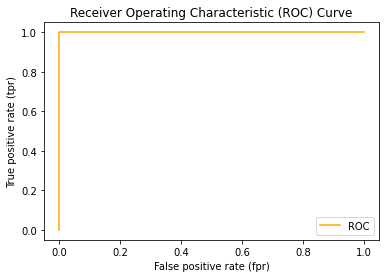

In [49]:
# Plot perfect ROC curve and AUC score
fpr, tpr, threshholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [50]:
# Perfect AUC score
roc_auc_score(y_test, y_test) # Everything is true positives

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actuval labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused.

In [51]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [52]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Labels'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


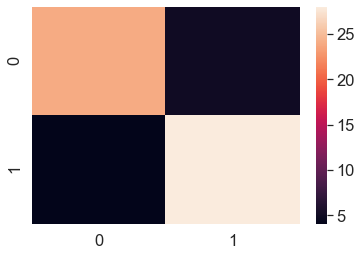

In [53]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

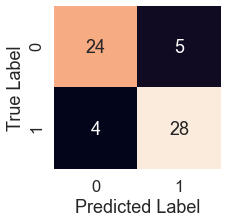

In [54]:
def plot_conf_mat(conf_mat):
    '''
    PLots a confusion matrix using Seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label');
    
    # Fix the broken annotations
    # bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom+0.5, top-0.5)
    
plot_conf_mat(conf_mat)

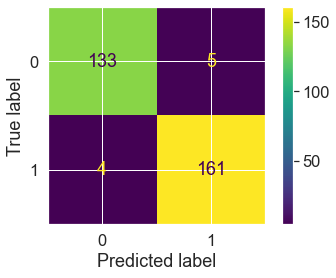

In [55]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y);

**Classification Report**

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [57]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

D:\anaconda3\envs\mlearning\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of asmple which are labeled  with 0 or 1)
* **Precision** and **Recall** become more important when classes are imbalanced
* if false positive predictions are worse than false negatives, aim for higher precision
* if false negative predictions are worse than false positive, aim for higher recall
* **F1-score** is a combination of precision and recall

### Regression model evaluation metrics

Model evaluation metrics documentation: https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (R-Squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers, its R^2 value would be 1.

In [58]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [59]:
# Import random forest regressor
from sklearn.ensemble import RandomForestRegressor

# Set a random seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit a model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [60]:
model.score(X_test, y_test)

0.8654448653350507

In [62]:
from sklearn.metrics import r2_score

y_preds = model.predict(X_test)
r2 = r2_score(y_test, y_preds)
r2

0.8654448653350507

In [63]:
# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [64]:
y_test.mean()

21.488235294117644

In [65]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [66]:
r2_score(y_test, y_test_mean)

0.0

In [67]:
r2_score(y_test, y_test)

1.0

**Mean absolute error (MAE)**

is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong yout models predictions are.

In [68]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [69]:
df = pd.DataFrame(data={'actual values':y_test,
                        'predicted values':y_preds})

df['differences'] = df['predicted values'] - df['actual values']
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean squared error (MSE)**

In [70]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [71]:
np.square(df['differences'])

173     0.269361
274     3.334276
491     9.979281
72      0.435600
452     0.628849
         ...    
412    22.477081
436     8.271376
411    12.873744
86      5.267025
75      5.914624
Name: differences, Length: 102, dtype: float64

In [72]:
np.square(df['differences']).mean()

9.867437068627442

### Using the `scoring` parameter

In [73]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [74]:
# Import cross val and random forest classifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Set a random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Instantiate a model
model = RandomForestClassifier()

In [78]:
np.random.seed(42)
cv_acc = cross_val_score(model, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [80]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is 82.48%


In [82]:
np.random.seed(42)
cv_acc = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'The cross-validated accuracy is {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is 82.48%


In [84]:
# Precision
cv_precision = cross_val_score(model, X, y, cv=5, scoring='precision')
np.mean(cv_precision)

0.8329547346025924

In [85]:
# Recall
cv_recall = cross_val_score(model, X, y, cv=5, scoring='recall')
np.mean(cv_recall)

0.8545454545454545

In [86]:
# F1
cv_f1 = cross_val_score(model, X, y, cv=5, scoring='f1')
np.mean(cv_f1)

0.8231854226519981

How about our regression model?

In [87]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [88]:
# Import cross val score and random forest regressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Set a random seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Instantiate a model
model = RandomForestRegressor()

In [91]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
np.mean(cv_r2)

0.6243870737930857

In [92]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
np.mean(cv_r2)

0.6243870737930857

In [94]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-3.003222869345758

In [95]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
np.mean(cv_mse)

-21.12863512415064

### Using different evaluation metrics as sklearn functions

**Classification evaluation functions**

In [97]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [99]:
# Import
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Set a random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [101]:
# Make some predictions
y_preds = model.predict(X_test)

# Evaluate the classifier
print('Classifier metrics on the test set')
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'F1-Score: {f1_score(y_test, y_preds)}')

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1-Score: 0.8615384615384615


**Regression evaluation functions**

In [102]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [103]:
# Import
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Set a random seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit a model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [106]:
# Make some predictions 
y_preds = model.predict(X_test)

# Evaluate the regression model
print('Regression model metrics on the test set')
print(f'R2 Score: {r2_score(y_test, y_preds)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_preds)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_preds)}')

Regression model metrics on the test set
R2 Score: 0.8654448653350507
Mean Absolute Error (MAE): 2.136382352941176
Mean Squared Error (MSE): 9.867437068627442
